In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split

In [414]:
df = pd.read_csv("co2.csv")
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6765,DODGE,Charger AWD,FULL-SIZE,3.6,6,A8,X,12.8,8.7,11.0,26,258
3732,GENESIS,G80 AWD,FULL-SIZE,5.0,8,AS8,Z,17.2,10.5,14.2,20,332
6679,CHEVROLET,Camaro,SUBCOMPACT,3.6,6,AS10,X,12.5,8.1,10.5,27,247
4297,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,4.4,4.6,4.5,63,105
6638,BMW,Z4 sDrive30i,TWO-SEATER,2.0,4,AS8,Z,9.5,7.4,8.5,33,200


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [416]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [417]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [418]:
df.duplicated().sum()

np.int64(1103)

In [419]:
df.drop_duplicates(inplace = True)

C:\Users\anshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


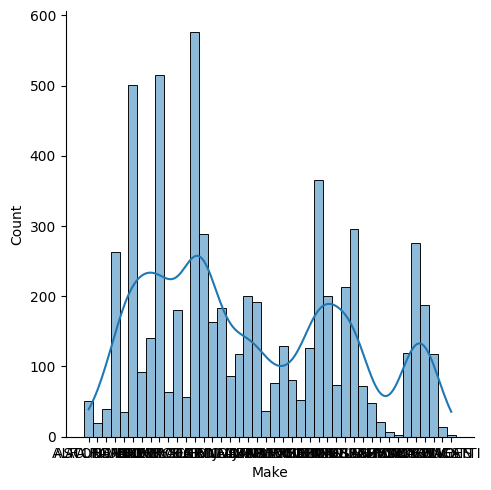

<Figure size 600x300 with 0 Axes>

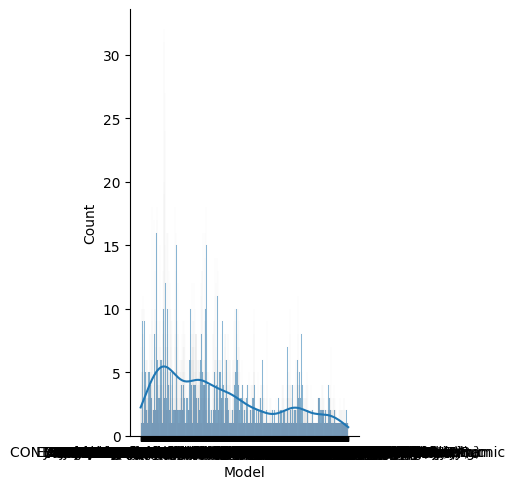

<Figure size 600x300 with 0 Axes>

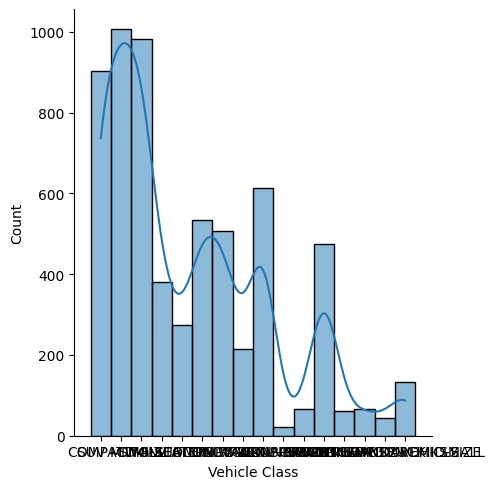

<Figure size 600x300 with 0 Axes>

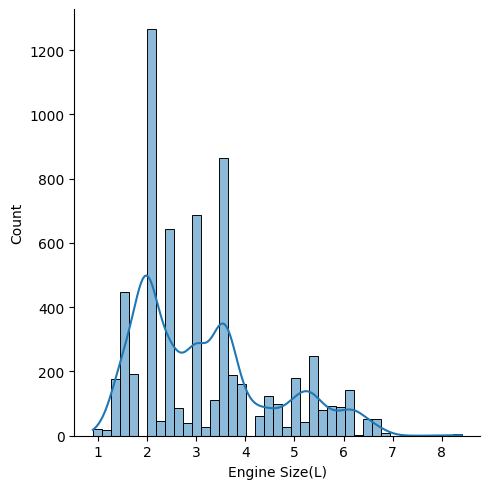

<Figure size 600x300 with 0 Axes>

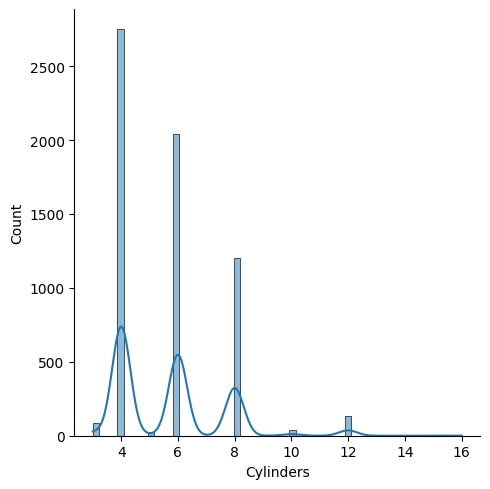

<Figure size 600x300 with 0 Axes>

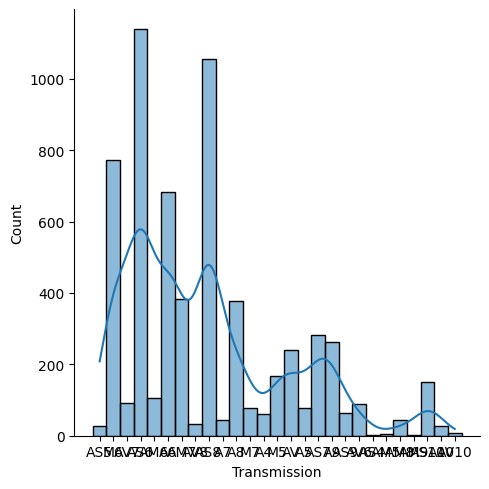

<Figure size 600x300 with 0 Axes>

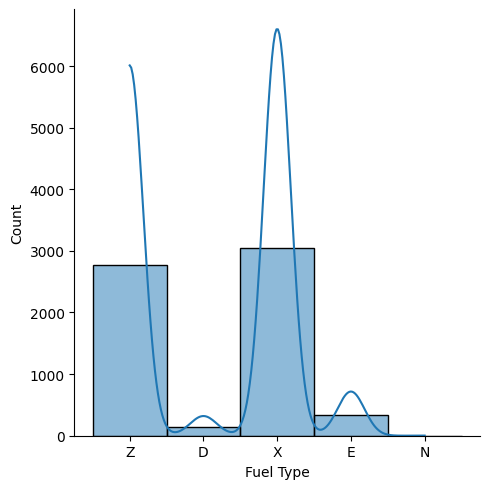

<Figure size 600x300 with 0 Axes>

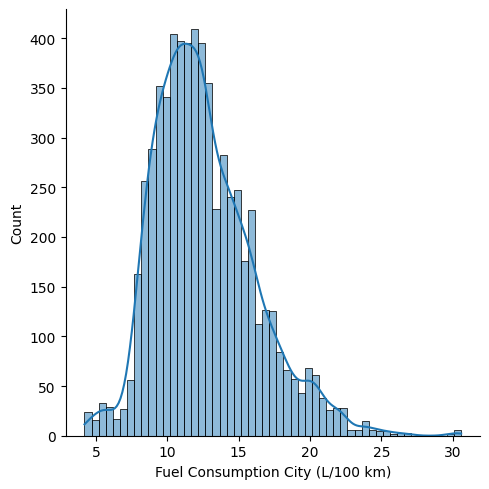

<Figure size 600x300 with 0 Axes>

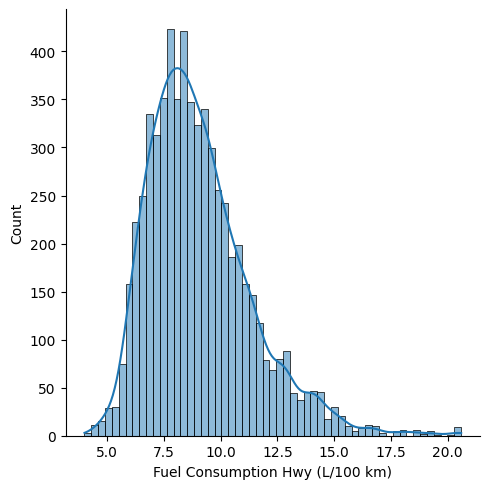

<Figure size 600x300 with 0 Axes>

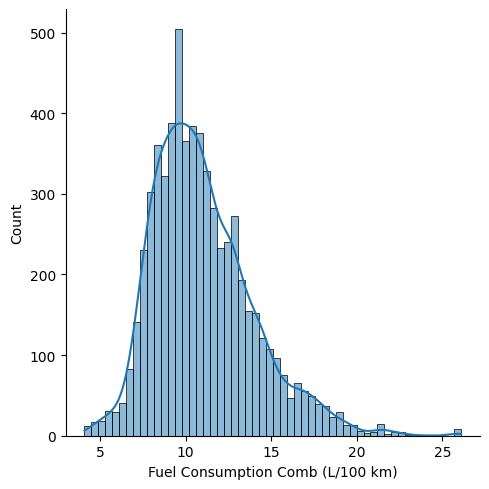

<Figure size 600x300 with 0 Axes>

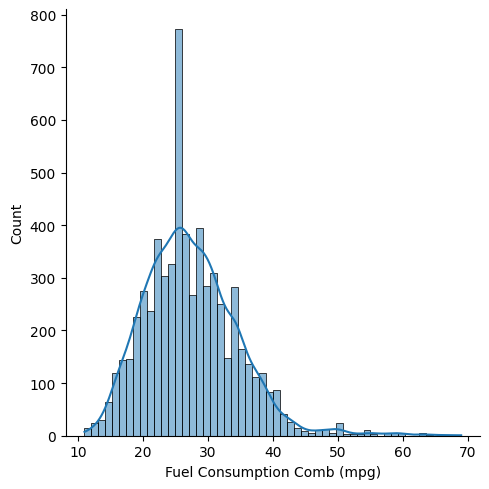

<Figure size 600x300 with 0 Axes>

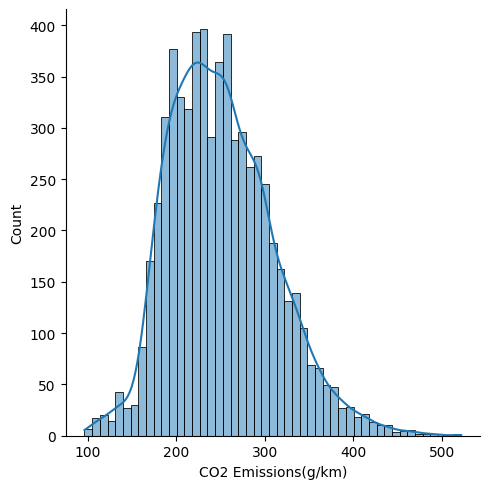

<Figure size 600x300 with 0 Axes>

In [420]:
for cols in df.columns:
    sns.displot(df[cols],kde=True)
    plt.figure(figsize=(6, 3))

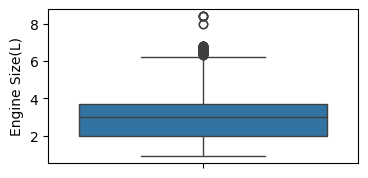

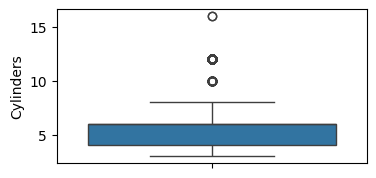

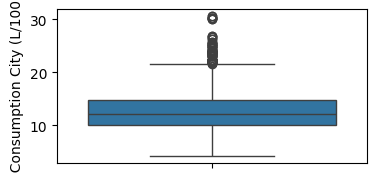

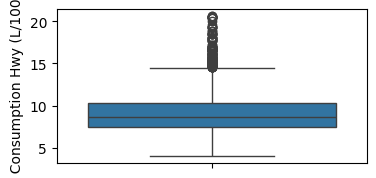

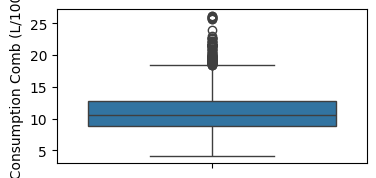

In [421]:
num_cols = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']
for cols in num_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(df[cols])

In [422]:
'''for label in df.columns[:-1]:
  plt.scatter(df[label],df['CO2 Emissions(g/km)'], color='Green')
  plt.xlabel(label)
  plt.ylabel('CO2 Emissions(g/km)')
  plt.tight_layout()
  plt.show()'''

"for label in df.columns[:-1]:\n  plt.scatter(df[label],df['CO2 Emissions(g/km)'], color='Green')\n  plt.xlabel(label)\n  plt.ylabel('CO2 Emissions(g/km)')\n  plt.tight_layout()\n  plt.show()"

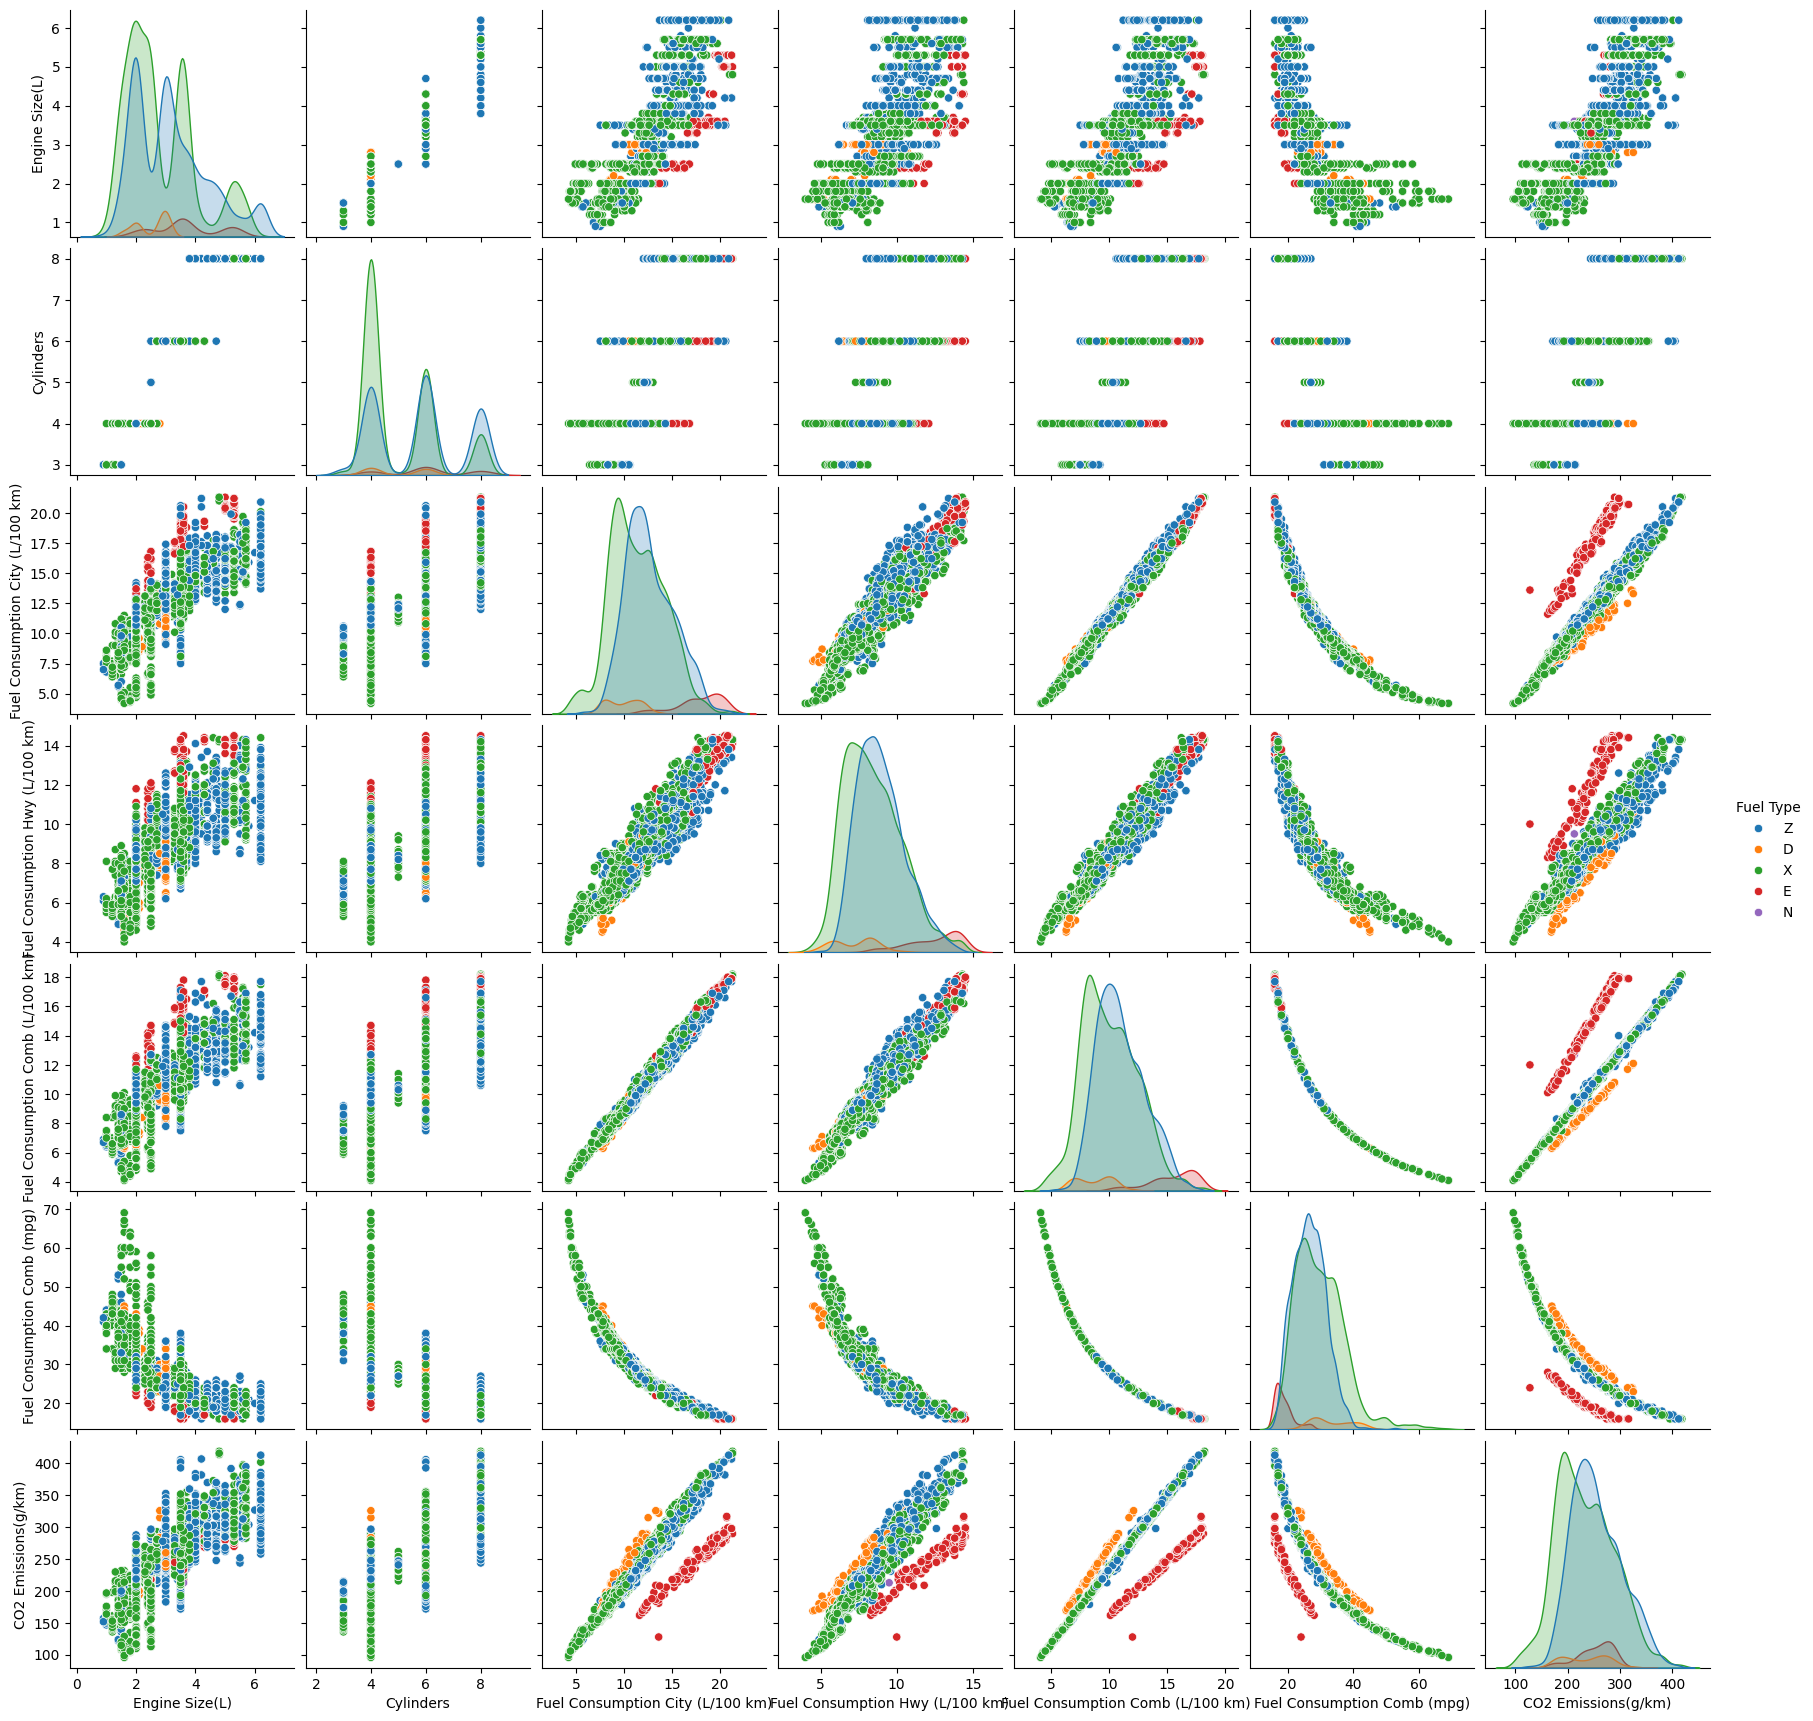

In [423]:
sns.pairplot(new_df, hue='Fuel Type')

In [424]:
# removing outliers

new_df = df.drop(['Make','Model'],axis=1)
for cols in num_cols:
    percentile25 = df[cols].quantile(0.25)
    percentile75 = df[cols].quantile(0.75)
    iqr = percentile75 - percentile25
    min_lim = percentile25 - 1.5*iqr
    max_lim = percentile75 + 1.5*iqr
    print(min_lim, max_lim)
    new_df = new_df[new_df[cols]<max_lim]
    print(new_df.shape)

-0.5500000000000003 6.25
(6161, 10)
1.0 9.0
(6063, 10)
3.2 21.599999999999998
(5975, 10)
3.299999999999999 14.500000000000002
(5921, 10)
3.200000000000002 18.4
(5921, 10)


In [425]:
'''for label in new_df.columns[:-1]:
  plt.scatter(new_df[label],new_df['CO2 Emissions(g/km)'], color='Green')
  plt.xlabel(label)
  plt.ylabel('CO2 Emissions(g/km)')
  plt.tight_layout()
  plt.show()'''

"for label in new_df.columns[:-1]:\n  plt.scatter(new_df[label],new_df['CO2 Emissions(g/km)'], color='Green')\n  plt.xlabel(label)\n  plt.ylabel('CO2 Emissions(g/km)')\n  plt.tight_layout()\n  plt.show()"

In [426]:
# encoding categorical data

catg_features = ['Fuel Type', 'Transmission', 'Vehicle Class']
encoded_df = pd.get_dummies(new_df, columns=catg_features, drop_first=True)
encoded_df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [427]:
# splitting the dataset

x_train, x_test, y_train, y_test= train_test_split(encoded_df.drop(['CO2 Emissions(g/km)'], axis=1), encoded_df['CO2 Emissions(g/km)'], test_size=0.2, random_state=42)

In [428]:
# standardization of data

std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_scaled = std_scaler.transform(x_train)
x_test_scaled = std_scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_train.columns)

In [429]:
x_train_scaled.sample(5)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
677,-0.818078,-0.905469,-0.213059,-0.150281,-0.174063,-0.008652,-0.191775,-0.014532,-1.018757,1.151577,...,-0.284661,-0.108396,-0.086286,-0.19588,-0.308268,-0.457937,-0.315603,-0.239539,-0.043634,-0.063466
2827,-0.818078,-0.905469,-0.179447,-0.675737,-0.336627,0.136138,-0.191775,-0.014532,-1.018757,1.151577,...,-0.284661,-0.108396,-0.086286,-0.19588,-0.308268,-0.457937,-0.315603,-0.239539,-0.043634,-0.063466
299,0.576158,0.414008,1.568341,2.266818,1.817344,-1.311760,-0.191775,-0.014532,0.981588,-0.868374,...,-0.284661,-0.108396,-0.086286,-0.19588,-0.308268,-0.457937,-0.315603,-0.239539,-0.043634,15.756369
891,2.216436,1.733486,1.232228,0.217538,0.882602,-0.877391,-0.191775,-0.014532,0.981588,-0.868374,...,-0.284661,-0.108396,-0.086286,-0.19588,-0.308268,-0.457937,-0.315603,-0.239539,-0.043634,-0.063466
2976,0.494144,0.414008,0.660836,1.215905,0.882602,-0.877391,-0.191775,-0.014532,0.981588,-0.868374,...,-0.284661,-0.108396,-0.086286,-0.19588,-0.308268,2.183707,-0.315603,-0.239539,-0.043634,-0.063466


In [430]:
def my_lr_fit(x_train,y_train):
    x_matrix = np.insert(x_train,0,1,axis=1)
    
    x_matrix = np.array(x_matrix,dtype= float)
    y_matrix = np.array(y_train,dtype= float) 
    
    x_transpose_x = np.dot(x_matrix.T, x_matrix)
    if np.linalg.det(x_transpose_x) == 0:
        betas = np.dot(np.linalg.pinv(x_transpose_x), x_matrix.T).dot(y_matrix)
    else:
        betas = np.linalg.inv(x_transpose_x).dot(x_matrix.T).dot(y_matrix)
        
    coef = betas[1:]
    intercept = betas[0]

    print('Y-intercept:', intercept)
    print('Coefficients:',coef)

    return coef, intercept

In [431]:
def my_lr_predict(x_test, coef, intercept):
    x_Test_matrix = np.array(x_test,dtype= float)
    y_pred = np.dot(x_test, coef) + intercept
    return y_pred

In [432]:
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(x_train_scaled,y_train)

LinearRegression()

In [433]:
coef_scaled,intercept_scaled = my_lr_fit(x_train_scaled,y_train)

Y-intercept: 244.6066300675676
Coefficients: [ 2.88351228e-01  2.50861150e-02  1.68869035e+01  1.04336522e+01
  2.69703795e+01 -2.75199789e+00 -2.49472905e+01 -1.62478467e+00
 -1.52130973e+01 -1.54481202e+01 -4.18689233e-01 -4.54559066e-01
 -1.28568217e+00 -2.06590733e-01 -5.76800196e-01 -3.30078555e-01
 -1.13513309e-01 -2.27390179e-01 -5.56276202e-01 -1.89629455e-01
  5.71680921e-03 -2.03862355e-01 -1.30411424e-01 -3.33533164e-01
 -1.28676912e+00 -7.17426734e-01 -8.80060903e-01 -2.19507684e-01
 -5.45073517e-01 -9.13979127e-02 -5.29347811e-01 -3.67429034e-01
 -3.13302415e-01 -6.01764161e-01 -1.10794238e+00 -2.83022375e-01
  1.43391275e-01  7.38965975e-02 -1.37586292e-01 -1.00233347e-01
  2.42394833e-01 -4.03248532e-02  3.63222407e-02 -2.65213775e-02
 -1.25607907e-01  9.36579107e-03 -1.92295212e-01  1.02105334e-01
  6.83726829e-02 -2.27281929e-02  1.14502077e-01]


In [434]:
"""for label in x_test.columns:
  plt.scatter(x_test[label],y_test)
  plt.scatter(x_test[label],lr_model.predict(x_test), color='red')
  plt.xlabel(label)
  plt.ylabel('CO2 Emissions(g/km)')
  plt.show()"""

"for label in x_test.columns:\n  plt.scatter(x_test[label],y_test)\n  plt.scatter(x_test[label],lr_model.predict(x_test), color='red')\n  plt.xlabel(label)\n  plt.ylabel('CO2 Emissions(g/km)')\n  plt.show()"

In [435]:
scaled_y_pred = my_lr_predict(x_test_scaled,coef_scaled,intercept_scaled)
scaled_y_pred

array([295.52364263, 334.47171417, 298.88406041, ..., 211.80531056,
       280.34136468, 275.1503408 ])

In [436]:
model_y_pred = lr_model_scaled.predict(x_test_scaled)
model_y_pred

array([295.52364263, 334.47171417, 298.88406041, ..., 211.80531056,
       280.34136468, 275.1503408 ])

In [437]:
r2_val_model = r2_score(y_test, model_y_pred)
mse_val_model = mean_squared_error(y_test, model_y_pred)
print( 'R2 score of model =', r2_val_model)
print( 'Mse of model =', mse_val_model)

R2 score of model = 0.995109641191686
Mse of model = 13.417963702771237


In [438]:
r2_val_myLR = r2_score(y_test, scaled_y_pred)
mse_val_myLR = mean_squared_error(y_test, scaled_y_pred)
print( 'R2 score of myLR =', r2_val_myLR)
print( 'Mse of myLR =', mse_val_myLR)

R2 score of myLR = 0.9951096411916863
Mse of myLR = 13.417963702770582
